# <span style="color:gray">ML_Session_4주차_과제_답</span>  

In [ ]:
import pandas as pd
from pandas import DataFrame, Series

import numpy as np
import os

# sklearn
import sklearn

import warnings
warnings.filterwarnings(action='ignore') 

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 

# 01. SVM (총 25점)

### 01-1) SVM은 어떤 모델이고, 어떤 아이디어를 사용하나요? (5점)

In [ ]:
# 답)
# SVM은 Support Vector Machine으로 
# class가 다른 데이터들을 가장 큰 마진으로 
# 분리해내는 선 또는 면을 찾아내는 다목적 머신러닝 모델로
# 기본 아이디어로는 class 사이에 가장 폭 넓은 도로를 찾아내는 것이다.


### 01-2) SVM모델을 불러오고, (데이터)에 적용해보세요. (총 8점)

X_train, X_test, y_train, y_test로 X와y를 분리하세요.  
test_size는 0.3, random_state는 42로 설정해주세요.  
모델은 Pipeline을 사용해서 StandardScaler도 같이 사용한 경우와 안사용했을 경우도 해보세요~  

fit할 때, X_train,y_train 사용하시고, Acuuracy 점수 낼 때는 X_test와 y_test를 사용해주세요  

In [ ]:
#(총 8점)
# data import
from sklearn.datasets import load_wine

# data 불러오기
wine=load_wine()
X, y = wine.data, wine.target

# X, y 분류 (3점)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 적용 (4점)
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", SVC(kernel="linear", random_state=42)),
    ])

svm_clf.fit(X_train, y_train)

# predict (1점)
print('Accuracy = ', accuracy_score(y_test, svm_clf.predict(X_test)))

Accuracy =  0.9814814814814815


### 01-3) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (3가지 이상 해보세요~) (12점)

In [ ]:
# C는 마진 오류를 얼마나 허용할 것인지를 지정한다.
# kernel로는 linear, poly, rbf 등이 사용 가능하고
# 커널을 poly로 했을 때, dgree와 coef0, gamma를 더 조정할 수 있고
# 커널을 rbf로 했을 경우, gamma를 더 조정할 수 있다.
# gamma는 결정 경계를 얼마나 유연하게 그릴지 결정하고, 클수록 overfitting될 수 있다.


In [ ]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, C=3))
    ])
poly_kernel_svm_clf.fit(X_train, y_train)

print('Accuracy = ', accuracy_score(y_test, poly_kernel_svm_clf.predict(X_test)))

Accuracy =  0.9074074074074074


In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X_train, y_train)

print('Accuracy = ', accuracy_score(y_test, poly_kernel_svm_clf.predict(X_test)))

Accuracy =  0.9814814814814815


In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X_train, y_train)

print('Accuracy = ', accuracy_score(y_test, poly_kernel_svm_clf.predict(X_test)))

Accuracy =  1.0


In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X_train, y_train)

print('Accuracy = ', accuracy_score(y_test, rbf_kernel_svm_clf.predict(X_test)))

Accuracy =  0.3888888888888889


---

# 02. Naive Bayes (총 7점)

### 02-1) Naive Bayes는 어떤 모델인가요? (5점)

In [ ]:
# 답)  
# 특성들 사이의 독립을 가정하는 Bayes 정리를 적용한 확률 분류기의 일종이다.


### 02-2) Naive Bayes가 많이 사용되는 분야는 어디인가요? (2점)

In [ ]:
# 답)  
# 단순화 시켜서 쉽고, 빠르게 판단을 내릴 때 주로 사용되고,
# 예로는 문서 분류, 질병 진단, 스팸 메일 분류 등에 많이 사용된다.


---

# 03. KNN (총 34점)

### 03-1) KNN은 어떤 모델인가요? (5점)

In [ ]:
# 답)  
# K-Nearest Neighbor로 새로운 데이터가 주어지면 가장 가까운 k개 이웃의 데이터를 살펴본 뒤,
# 더 많은 데이터가 포함되어 있는 범주로 데이터를 예측하는 모델이다.


### 03-2) 파라미터 n_neighbors를 작게할 경우와 많이 크게할 경우 어떤 차이점이 있나요? (3점)

In [ ]:
# 답)  
# k가 작을 경우, 데이터의 지역적 특성을 지나치게 반영하게 되서 overfitting되고,
# k가 너무 클 경우, 모델이 과하게 정규화되서 underfitting되는 경향이 있다.


### 03-3) 유클리드 거리를 사용하려면 파라미터를 어떻게 설정해야되나요? (3점)

In [ ]:
# 답)  
# metric을 디폴트 값인 minkowski로 지정하고,
# p를 2라고 할 때 표준 유클리드 거리이다.


### 03-4) 맨하튼 거리를 사용하려면 파라미터를 어떻게 설정해야되나요? (3점)

In [ ]:
# 답)  
# metric을 디폴트 값인 minkowski로 지정하고,
# p를 1라고 할 때 맨하튼 거리이다.


### 03-5) KNN모델을 불러오고, (데이터)에 적용해보세요. (총 8점)

X_train, X_test, y_train, y_test로 X와y를 분리하세요.  
test_size는 0.3, random_state는 42로 설정해주세요.  
모델은 Pipeline을 사용해서 StandardScaler도 같이 사용한 경우와 안사용했을 경우도 해보세요~  

fit할 때, X_train,y_train 사용하시고, Acuuracy 점수 낼 때는 X_test와 y_test를 사용해주세요  

In [ ]:
#(총 8점)
# data import
from sklearn.datasets import load_digits

# data 불러오기
digits=load_digits()
X, y = digits.data, digits.target

# X, y 분류 (3점)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 적용 (4점)
KNN = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2)

KNN.fit(X_train, y_train)

# predict (1점)
print('Accuracy = ', accuracy_score(y_test, KNN.predict(X_test)))

Accuracy =  0.9888888888888889


### 03-6) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (12점)

In [ ]:
# 파라미터를 변경해보세요~ (3가지 이상 해보세요~)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train, y_train)
print('Accuracy = ', accuracy_score(y_test, KNN.predict(X_test)))

Accuracy =  0.9888888888888889


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)
print('Accuracy = ', accuracy_score(y_test, KNN.predict(X_test)))

Accuracy =  0.9925925925925926


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10)

KNN.fit(X_train, y_train)
print('Accuracy = ', accuracy_score(y_test, KNN.predict(X_test)))

Accuracy =  0.9814814814814815


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
KNN.fit(X_train, y_train)
print('Accuracy = ', accuracy_score(y_test, KNN.predict(X_test)))

Accuracy =  0.9925925925925926


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=1)
KNN.fit(X_train, y_train)
print('Accuracy = ', accuracy_score(y_test, KNN.predict(X_test)))

Accuracy =  0.9833333333333333


In [ ]:
# 주로 n_neighbors와 weights, p를 이용해서 파라미터를 변경하고,
# n_neighbors가 5일 때가 더 좋은 성능을 보였고,
# metric='minkowski', p=2로 유클리드 거리로 했을 경우와
# metric='minkowski', p=1로 맨해튼 거리로 했을 때, 
# 현재 데이터에서는 유클리드로 했을 때 정확도가 더 높게 측정된다.


---

# 04. Decision Tree (총 34점)

### 04-1) Decision Tree는 어떤 모델인가요? (5점)

In [ ]:
# 답) 
# 특정 규칙에 따라서 레이블을 분류하는 모델로
# 분류와 회귀, 다중 출력이 가능한 머신러닝 알고리즘이다.
# DT는 Random Forest의 기본 구성 요소이다.


### 04-2) 아래 그림의 빈칸을 채우세요. (각 1점)

<img src='http://drive.google.com/uc?export=view&id=1romkz8fVQ5Hg5rwCiWlrTqgUIa4GxS_X' /><br>

In [ ]:
# 답)  

# 1) 루트노드,root node
# 2) 리프노드,leaf node
# 3) parent node
# 4) child node

### 04-3) DT모델을 불러오고, (데이터)에 적용해보세요. (총 13점)

#### 데이터를 불러온 뒤, X와y를 설정하고, test_size를 0.3으로 random_state는 42로 설정해서 train과 test로 나눠보세요
#### random_state를 0으로 한 경우와 다양하게 파라미터를 변경해보고, tree를 시각화했을 때 변하는 것이 있는지 확인해보세요

plot_tree(모델이름, feature_names = explt_vars, class_names = fct_val, filled = True) 을 사용해서 시각화해보세요  
ROC_AUC와 Accuarcy 점수를 구해보세요  

In [ ]:
# 사용한 데이터 : breast_cancer dataset
from sklearn.datasets import load_breast_cancer

breast_cancer=load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

explt_vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture','worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points','worst symmetry', 'worst fractal dimension']
fct_val = {0: 'malignant', 1: 'benign'}

AUC =  0.9298941798941799
Accuracy =  0.9239766081871345


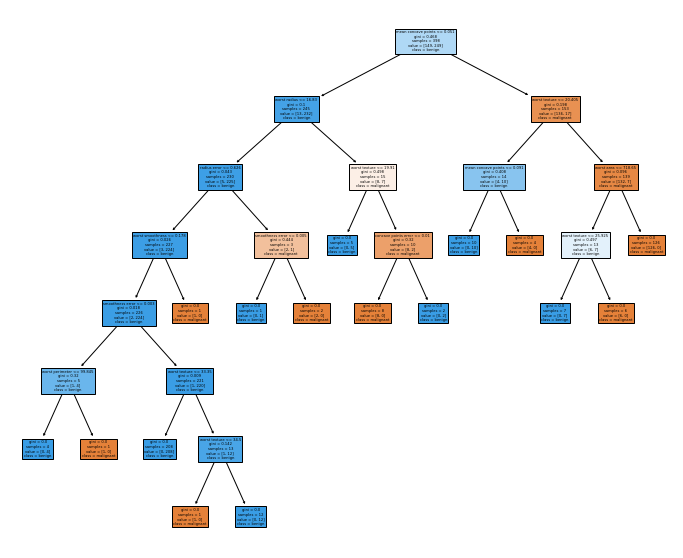

In [ ]:
# (총 13점)
# X, y 분류 (3점)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 적용 fit (4점)
# random_state=0으로 설정했을 경우
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train,y_train)

# predict (2점)
print('AUC = ', roc_auc_score(y_test, dt_clf.predict(X_test)))
print('Accuracy = ', accuracy_score(y_test, dt_clf.predict(X_test)))

# tree 시각화 (4점)
plt.figure(figsize = (12,10)) # 크기는 조절하세요~
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True)
plt.show()

### 04-4) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (12점)
각 파라미터가 어떤 역할을 하는지 간단하게 설명도 해주세요

In [ ]:
# 파라미터를 변경해보세요~ (3가지 이상 해보세요~) (12점)

AUC =  0.9437830687830687
Accuracy =  0.9415204678362573


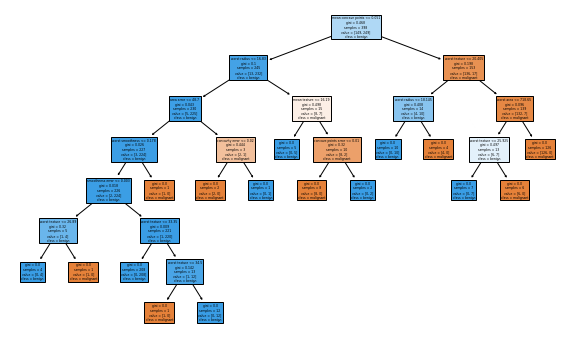

In [ ]:
# random_state=42 조정
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)

print('AUC = ', roc_auc_score(y_test, dt_clf.predict(X_test)))
print('Accuracy = ', accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize = (10,6))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True)
plt.show()

AUC =  0.9623015873015873
Accuracy =  0.9649122807017544


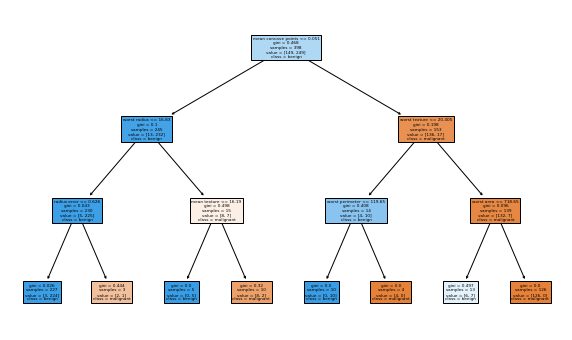

In [ ]:
# max_depth 조정
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X_train,y_train)

print('AUC = ', roc_auc_score(y_test, dt_clf.predict(X_test)))
print('Accuracy = ', accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize = (10,6))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True)
plt.show()

AUC =  0.9576719576719575
Accuracy =  0.9590643274853801


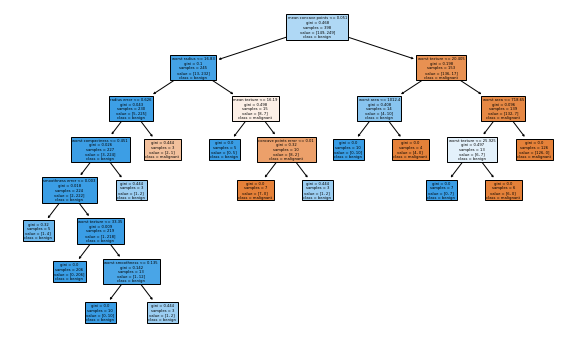

In [ ]:
# min_samples_leaf 조정
dt_clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=3)
dt_clf.fit(X_train,y_train)

print('AUC = ', roc_auc_score(y_test, dt_clf.predict(X_test)))
print('Accuracy = ', accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize = (10,6))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True)
plt.show()

AUC =  0.8895502645502645
Accuracy =  0.9064327485380117


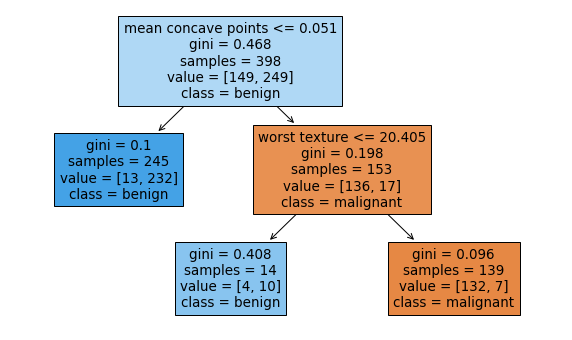

In [ ]:
# max_leaf_nodes 조정
dt_clf = DecisionTreeClassifier(random_state=0, max_leaf_nodes=3)
dt_clf.fit(X_train,y_train)

print('AUC = ', roc_auc_score(y_test, dt_clf.predict(X_test)))
print('Accuracy = ', accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize = (10,6))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True)
plt.show()

In [ ]:
# random_state를 조정해서도 성능이 차이가 날 수 있다.
# max_depth는 최대 깊이를 지정한다.
# min_samples_leaf 리프 노드가 가지고 있어야 할 최소 샘플 수이다.
# max_leaf_nodes는 리프 노드의 최대수를 지정해준다.
